<a href="https://colab.research.google.com/github/IKJHGF/assignment__arguments/blob/main/shark_attack_question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%reload_ext google.colab.data_table

path='/content/drive/MyDrive/attacks.csv'
df=pd.read_csv(path, encoding='ISO-8859-1')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df_copy = df.copy()

In [101]:
# 2. Are children more likely to be attacked by sharks?
df1 = df_copy.drop(columns= ['Date', 'Case Number', 'Type', 'Activity', 'Name', 'Species ', 'Injury', 'Year', 'Country', 'Area', 'Location', 'Sex ', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']) # drop colums that are not essential for question 2
df1 #show reduced table

,Age,Fatal (Y/N)
0,57,N
1,11,N
2,48,N
3,NaN,N
4,NaN,N
...,...,...
25718,NaN,NaN
25719,NaN,NaN
25720,NaN,NaN
25721,NaN,NaN


In [102]:
df2 = df1.dropna(how='all') # drop rows with only missing (NaN) values
df2

,Age,Fatal (Y/N)
0,57,N
1,11,N
2,48,N
3,NaN,N
4,NaN,N
...,...,...
6297,NaN,Y
6298,NaN,Y
6299,NaN,Y
6300,NaN,Y


In [103]:
df3 = df2.rename(columns={'Fatal (Y/N)': 'Fatal'}) # rename colum with long title and with spaces
df3

,Age,Fatal
0,57,N
1,11,N
2,48,N
3,NaN,N
4,NaN,N
...,...,...
6297,NaN,Y
6298,NaN,Y
6299,NaN,Y
6300,NaN,Y


In [104]:
print(df3['Fatal'].unique()) # show all unique values in column 'Fatal' (it should be Y(es() or N(o)) or nan)

['N' 'Y' nan 'M' 'UNKNOWN' '2017' ' N' 'N ' 'y']


In [105]:
replace_values_1 = {' N' : 'N', 'N ' : 'N', 'y' : 'Y','nan': np.NaN, 'M': np.NaN, 'UNKNOWN': np.NaN, '2017': np.NaN} # replace values in column Fatal to end up with only Y, N and nan 
df4 = df3.replace({'Fatal': replace_values_1})
df4

,Age,Fatal
0,57,N
1,11,N
2,48,N
3,NaN,N
4,NaN,N
...,...,...
6297,NaN,Y
6298,NaN,Y
6299,NaN,Y
6300,NaN,Y


In [106]:
print(df4['Age'].unique()) # show all unique values in column 'Age' (it should be a number or NaN)
df4['Age'].nunique() # count all unique values there are in column Age

['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40s' '28' '20' '24' '26' '49' '22' '7' '31' '17' '40' '13' '42' '3' '8'
 '50' '16' '82' '73' '20s' '68' '51' '39' '58' 'Teen' '47' '61' '65' '36'
 '66' '43' '60s' '9' '72' '59' '6' '27' '64' '23' '71' '44' '62' '63' '70'
 '18 months' '53' '30s' '50s' 'teen' '77' '74' '28 & 26' '5' '86'
 '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26' '8 or 10'
 '84' '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '75' '33 or 37' 'mid-30s'
 '23 & 20' ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18'
 '87' '67' 'Elderly' 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50'
 '18 to 22' 'adult' '9 & 12' '? & 19' '9 months' '25 to 35' '23 & 26' '1'
 '(adult)' '33 & 37' '25 or 28' '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35'
 '30 & 32' '50 & 30' '17 & 35' 'X' '"middle-age"' '13 or 18' '34 & 19'
 '33 & 26' '2 to 3 months' 'MAKE LINE GREEN' ' 43' '

157

In [107]:
replace_values_2 = {' ': np.NaN, '  ': np.NaN, '20s' : '20', 'Teen' : '15', '60s' : '60', '40s' : '40','18 months': '1', 'Both 11': '11 & 11', '30s' : '30', '28, 23 & 30': '28,23,30', '7      &    31': '7 & 31', '?    &   14': '14', '50s' : '50', 'teen': '15', '25 to 35': '30', 'nan': np.NaN, '18 or 20': '19', '12 or 13': '12', 'Teens': '15', '8 or 10': '9', '\xa0 ': np.NaN, '30 or 36': '33', '6½': '6', '21 & ?': '21', '33 or 37': '35', 'mid-30s': '35', ' 30': '30', ' 28': '28', '20?': '20', "60's": '60', '16 to 18': '17', 'Elderly': '60', 'mid-20s': '25', 'Ca. 33': '33', '74 ': '74', '45 ': '45', '21 or 26': '23', '20 ': '20', '>50': '50', '18 to 22': '20', '9 months': '0', 'adult': '35', '(adult)': '35', '25 or 28': '27', 'X': np.NaN, '"middle-age"': '50', '13 or 18': '15', '2 to 3 months': '0', 'MAKE LINE GREEN': np.NaN, ' 43': '43', '"young"': '10', '7 or 8': '7', 'F': np.NaN, '9 or 10': '9', 'young': '10', 'A.M.': np.NaN, '10 or 12': '11', '31 or 33': '32', '2½': '2', '13 or 14': '13'} # replace values in column Age to end up with only numbers and nan 
df5 = df4.replace({'Age': replace_values_2})
df5
#df5 = df4[pd.to_numeric(df4['Age'], errors='coerce').notnull()] # remove non numeric rows in one column, column Age

,Age,Fatal
0,57,N
1,11,N
2,48,N
3,NaN,N
4,NaN,N
...,...,...
6297,NaN,Y
6298,NaN,Y
6299,NaN,Y
6300,NaN,Y


In [108]:
print(df5['Age'].unique()) # show all unique values in column 'Age' (it should be a number or NaN)
df5['Age'].nunique() # count all unique values there are in column Species

['57' '11' '48' nan '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40' '28' '20' '24' '26' '49' '22' '7' '31' '17' '13' '42' '3' '8' '50'
 '16' '82' '73' '68' '51' '39' '58' '47' '61' '65' '36' '66' '43' '9' '72'
 '59' '6' '27' '64' '23' '71' '44' '62' '63' '70' '1' '53' '77' '74'
 '28 & 26' '5' '86' '46 & 34' '28,23,30' '36 & 26' '84' '75' '23 & 20'
 '7 & 31' '32 & 30' '87' '67' '9 & 12' '? & 19' '0' '23 & 26' '33 & 37'
 '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35' '30 & 32' '50 & 30' '17 & 35'
 '34 & 19' '33 & 26' '81' '78' '17 & 16' '11 & 11' '36 & 23' '2']


103

In [109]:
df6 = df5[df5['Fatal'].notna()] # drop rows with NaN values in column Fatal
df7 = df6[df6['Age'].notna()] # drop rows with NaN values in column Age
df7

,Age,Fatal
0,57,N
1,11,N
2,48,N
6,18,Y
7,52,N
...,...,...
6243,16,N
6254,50,Y
6265,13,Y
6276,16,Y


In [110]:
print(df7['Fatal'].unique()) # show unique values in column Fatal
print(df7['Age'].unique()) # show unique values in column Age
df7['Age'].nunique()

['N' 'Y']
['57' '11' '48' '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40' '28' '20' '24' '26' '49' '22' '7' '31' '17' '13' '42' '3' '50' '16'
 '82' '73' '51' '39' '58' '47' '61' '65' '36' '66' '43' '9' '72' '59' '6'
 '64' '23' '71' '44' '27' '62' '68' '63' '70' '1' '53' '8' '77' '74'
 '28 & 26' '5' '86' '46 & 34' '28,23,30' '36 & 26' '84' '7 & 31' '32 & 30'
 '87' '75' '9 & 12' '0' '23 & 26' '33 & 37' '30 & 32' '50 & 30' '17 & 35'
 '33 & 26' '81' '78' '17 & 16' '11 & 11' '36 & 23' '2']


97

In [111]:
double_values = df7[df7['Age'].str.contains('&', na=False)] # test > how many strings are there in column Age that contain '&' and should be split to two or more rows
print(double_values)

          Age Fatal
698   28 & 26     N
1506  46 & 34     N
1743  36 & 26     N
2422   7 & 31     Y
2511  32 & 30     N
3459   9 & 12     N
3742  23 & 26     Y
3880  33 & 37     N
4009  30 & 32     N
4035  50 & 30     N
4039  17 & 35     N
4118  33 & 26     Y
4587  17 & 16     N
4801  11 & 11     N
4999  36 & 23     Y


In [112]:
df8['Age'] = df7['Age'].str.replace(" & ", ",", case=False)

In [113]:
print(df8['Age'].unique()) # show unique values in column Age
df8['Age'].nunique() # count unique values

['57' '11' '48' '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40' '28' '20' '24' '26' '49' '22' '7' '31' '17' '13' '42' '3' '50' '16'
 '82' '73' '51' '39' '58' '47' '61' '65' '36' '66' '43' '9' '72' '59' '6'
 '64' '23' '71' '44' '27' '62' '68' '63' '70' '1' '53' '8' '77' '74'
 '28,26' '5' '86' '46,34' '28,23,30' '36,26' '84' '7,31' '32,30' '87' '75'
 '9,12' '0' '23,26' '33,37' '30,32' '50,30' '17,35' '33,26' '81' '78'
 '17,16' '11,11' '36,23' '2']


97

In [114]:
df9 = df8.assign(Age=df8['Age'].str.split(',')).explode('Age') # split rows with two or more values in two or more rows
df9

,Age,Fatal
0,57,N
1,11,N
2,48,N
6,18,Y
7,52,N
...,...,...
6243,16,N
6254,50,Y
6265,13,Y
6276,16,Y


In [115]:
df10 = df9[df9['Age'].notna()]
print(df10['Age'].unique()) # show unique values in column Age
df10['Age'].nunique() # show number of unique values in column Age

['57' '11' '48' '18' '52' '15' '12' '32' '10' '21' '34' '30' '60' '33'
 '29' '54' '41' '37' '56' '19' '25' '69' '38' '55' '35' '46' '45' '14'
 '40' '28' '20' '24' '26' '49' '22' '7' '31' '17' '13' '42' '3' '50' '16'
 '82' '73' '51' '39' '58' '47' '61' '65' '36' '66' '43' '9' '72' '59' '6'
 '64' '23' '71' '44' '27' '62' '68' '63' '70' '1' '53' '8' '77' '74' '5'
 '86' '84' '87' '75' '0' '81' '78' '2']


81

In [116]:
df11 = df10['Age'].value_counts().nlargest(10) # show 10 largest number of shark attacks sorted by age of victim
print(df11)

15    152
20    142
18    141
17    139
19    137
16    136
21    112
22    109
25    102
24     98
Name: Age, dtype: int64


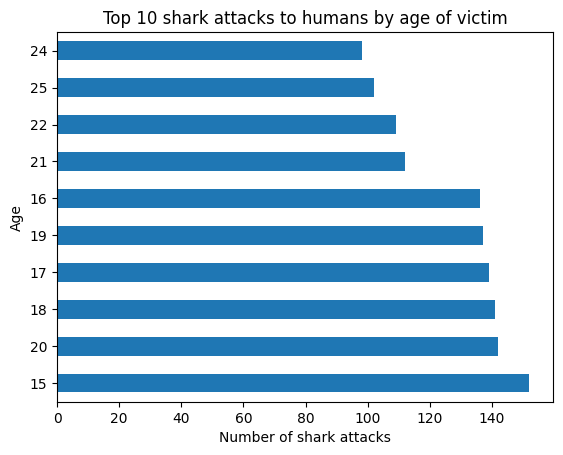

In [117]:
df11.plot(kind='barh') # make a graph of it
plt.title('Top 10 shark attacks to humans by age of victim')
plt.xlabel('Number of shark attacks')
plt.ylabel('Age');

In [ ]:
rk 

Answer to question 2 'Are children more likely to be attacked by sharks?' 

First we have to define what age is considered a child. I define it a follows (source: https://www.nih.gov/nih-style-guide/age#:~:text=Children%20(1%20year%20through%2012,Adults%20(18%20years%20or%20older)):
- Children (1 year through 12 years) 
- Adolescents (13 years through 17 years. They may also be referred to as teenagers depending on the context.) 
- Adults (18 years or older) 

In the graph above we see that in the top 10 accidents with sharks no children (age < 13) are involved. So the answer to the question is no. 

Other assumptions. In the dataset I replaced:
- 'young' by 10, 
- 'teen' by '15'
- 'adult' by '35'
- middle-age by '50'
- 'elderly' by '60'

Other choices could have been made, but in view of the answer to the question other choices wouldn't have made a difference.

Ultimately the graph does show interesting information if we consider adolescents as children too. The most accidents with sharks according to the given dataset happen with people of 15 year old. Also people of 16 and people of 17 years old are in the top 6 of accidents with sharks. Overall we see that in the top 10 all accidents occur within the age range of 15 - 25 years old. 